In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import math
import os

In [3]:

PATH_FULLSCREEN = "../data/end-to-end-fullscreen"
PATH_NO_FULLSCREEN = "../data/end-to-end-no-fullscreen"
files_no_fullscreen = os.listdir(PATH_NO_FULLSCREEN)
files_fullscreen = os.listdir(PATH_FULLSCREEN)
data_no_fullscreen = []
data_fullscreen = []

for file in files_no_fullscreen:
    data_in = pd.read_csv(f"{PATH_NO_FULLSCREEN}/{file}")
    data_no_fullscreen.append(data_in)
data_no_fullscreen = pd.concat(data_no_fullscreen)

for file in files_fullscreen:
    data_in = pd.read_csv(f"{PATH_FULLSCREEN}/{file}")
    data_fullscreen.append(data_in)
data_fullscreen = pd.concat(data_fullscreen)


data_no_fullscreen['mode'] = 'no_fullscreen'
data_fullscreen['mode'] = 'fullscreen'

In [4]:
data = pd.concat([data_fullscreen, data_no_fullscreen])
data

,Unnamed: 0,id,framework,complexity,framework_complexity,program,fw_running,program_fwrunning,ete,fw,diff,mode
0,0,0,DirectX11,default,DirectX11_default,getpixel,False,getpixel_False,9972,-1,9973,fullscreen
1,1,1,DirectX11,default,DirectX11_default,getpixel,False,getpixel_False,8732,-1,8733,fullscreen
2,2,2,DirectX11,default,DirectX11_default,getpixel,False,getpixel_False,10080,-1,10081,fullscreen
3,3,3,DirectX11,default,DirectX11_default,getpixel,False,getpixel_False,9872,-1,9873,fullscreen
4,4,4,DirectX11,default,DirectX11_default,getpixel,False,getpixel_False,9184,-1,9185,fullscreen
...,...,...,...,...,...,...,...,...,...,...,...,...
45,45,45,wxpython,rects,wxpython_rects,getpixel,False,getpixel_False,52552,-1,52553,no_fullscreen
46,46,46,wxpython,rects,wxpython_rects,getpixel,False,getpixel_False,50516,-1,50517,no_fullscreen
47,47,47,wxpython,rects,wxpython_rects,getpixel,False,getpixel_False,51636,-1,51637,no_fullscreen
48,48,48,wxpython,rects,wxpython_rects,getpixel,False,getpixel_False,69444,-1,69445,no_fullscreen


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_26272\1530974530.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='mode', dodge=True, color='black')
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_26272\1530974530.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='mode', dodge=True, color='black')
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_26272\1530974530.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.stripplot(ax=axes[2], data=data[data['complexity'] ==

(5000.0, 25000.0)

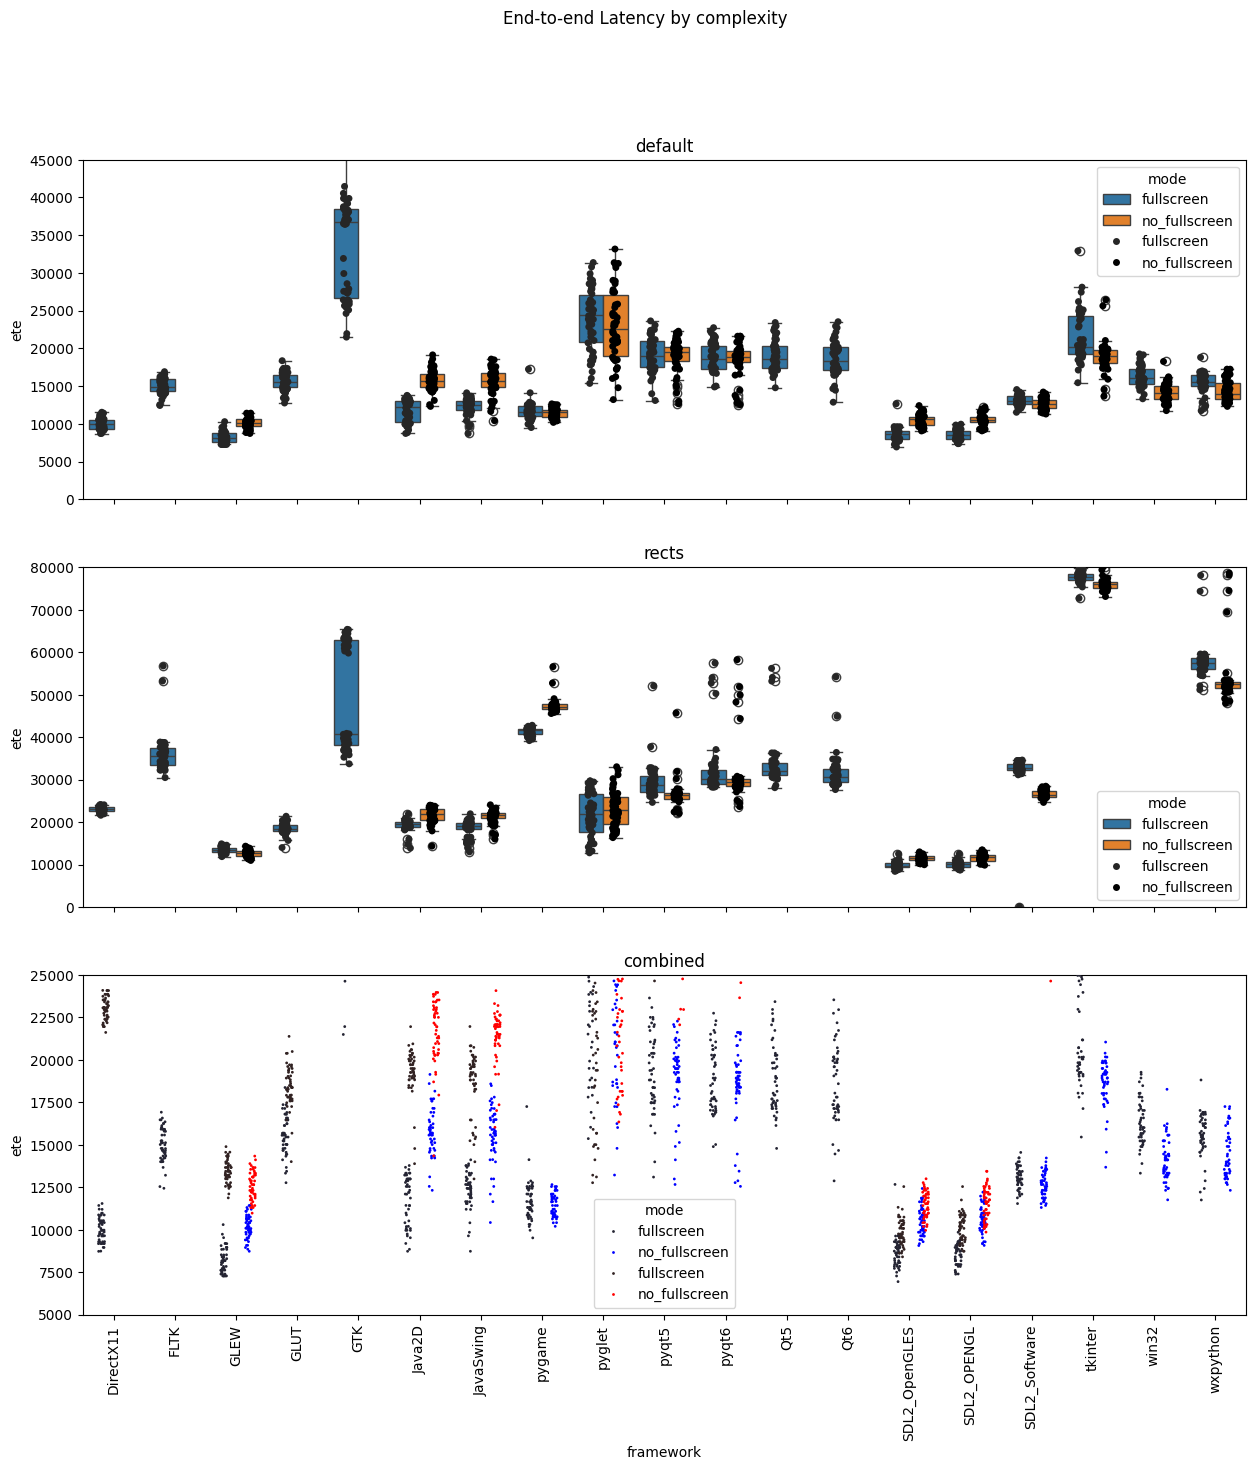

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)
fig.suptitle(f"End-to-end Latency by complexity")

sns.boxplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='mode', dodge=True)
sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='mode', dodge=True, color='black')
axes[0].set_title("default")
axes[0].set_ylim(0, 45000)

sns.boxplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='mode', dodge=True)
sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='mode', dodge=True, color='black')
axes[1].set_title("rects")
axes[1].set_ylim(0, 80000)

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
sns.stripplot(ax=axes[2], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='mode', dodge=True, color='blue', size=2)
sns.stripplot(ax=axes[2], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='mode', dodge=True, color='red', transform=offset(0.05)+trans, size=2)
axes[2].set_title("combined")

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_ylim(5000, 25000)